In [1]:
import numpy as np

def fetch(url):
    import pathlib, requests,os, hashlib, numpy, gzip
    fp = os.path.join("/tmp", hashlib.md5(url.encode("utf-8")).hexdigest())
    if(os.path.isfile(fp)):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=numpy.uint8).copy()
            



In [2]:
#fetch data
X_train = fetch("https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz")
Y_train = fetch("https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz")
X_test = fetch("https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz")
Y_test = fetch("https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz")

In [3]:
#normalize pixel
def preprocess_mnist(data):
    data = data[16:]   
    images = data.reshape(-1, 28, 28) 
    images = images.astype('float32') / 255.0
    
    return images

X_train_normalized = preprocess_mnist(X_train)
X_test_normalized = preprocess_mnist(X_test)

In [ ]:
#one-hot encoding
def one_hot_encoding(data):
    data = data[8:]
    
    n_labels = len(data)
    one_hot = np.zeros((n_labels, 10), dtype=np.int8)
    
    one_hot[np.arange(n_labels), data] = 1
    
    return one_hot
    
X_train = one_hot_encoding(Y_train)
Y_train = one_hot_encoding(Y_train)

class Model:
    def __init__(self, input_size, hidden_size, output_size):
        self.rng = np.random.default_rng()
        
        # Initialisierung der Gewichte mit der layer_init Funktion
        self.W1 = self.layer_init(input_size, hidden_size)
        self.W2 = self.layer_init(hidden_size, output_size)
        
        # Initialisierung der Biases mit Nullen
        self.b1 = np.zeros((1, hidden_size), dtype=np.float32)
        self.b2 = np.zeros((1, output_size), dtype=np.float32)

    def layer_init(self, m, h):
        # Gleichverteilte Initialisierung
        ret = self.rng.uniform(-1., 1., size=(m, h)) / np.sqrt(m * h)
        return ret.astype(np.float32)

array([[-1.03710385, -0.65970078,  0.52564606,  0.73631472,  0.46757579,
         1.16237345, -0.35743446,  0.03546401],
       [ 1.20989548, -0.54341561, -0.45706343, -1.06506489, -0.44782131,
         1.8360975 ,  0.37966257,  0.64418721]])

Matplotlib is building the font cache; this may take a moment.


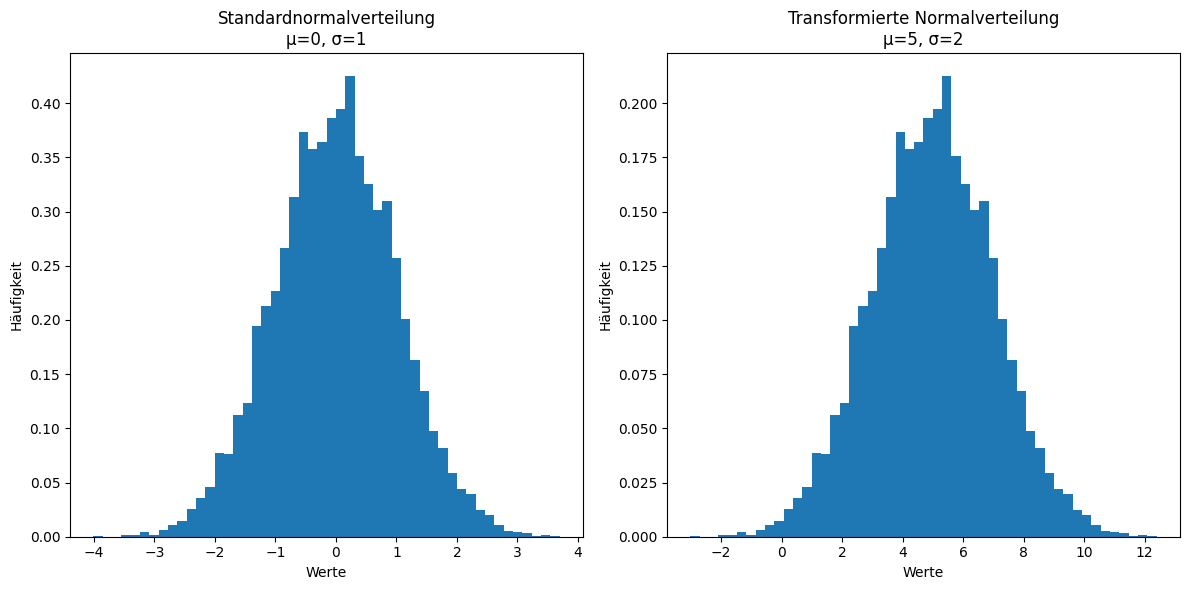

Standardnormal - Mittelwert: -0.00, Std.abw.: 1.00
Transformiert  - Mittelwert: 4.99, Std.abw.: 2.01
